In [34]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

np.random.seed(0)

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


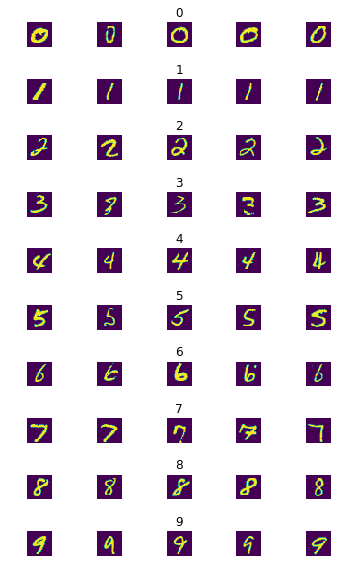

In [36]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :])
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

In [37]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_19 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_20 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
Total params: 9,530
Trainable params: 9,530
Non-trainable params: 0
_________________________________________________________________
None


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.5491 - acc: 0.8272 - val_loss: 0.2742 - val_acc: 0.9165
Epoch 2/10
54000/54000 [==============================] - 1s 12us/step - loss: 0.2873 - acc: 0.9153 - val_loss: 0.2122 - val_acc: 0.9310
Epoch 3/10
54000/54000 [==============================] - 1s 12us/step - loss: 0.2513 - acc: 0.9250 - val_loss: 0.1964 - val_acc: 0.9365
Epoch 4/10
54000/54000 [==============================] - 1s 12us/step - loss: 0.2259 - acc: 0.9333 - val_loss: 0.2000 - val_acc: 0.9427
Epoch 5/10
54000/54000 [==============================] - 1s 12us/step - loss: 0.2116 - acc: 0.9375 - val_loss: 0.1729 - val_acc: 0.9508
Epoch 6/10
54000/54000 [==============================] - 1s 12us/step - loss: 0.2004 - acc: 0.9399 - val_loss: 0.1654 - val_acc: 0.9508
Epoch 7/10
54000/54000 [==============================] - 1s 12us/step - loss: 0.1929 - acc: 0.9429 - val_loss: 0.1563 - val_acc:

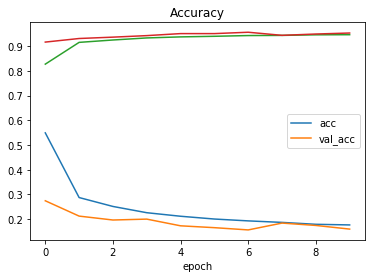

In [38]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = True)
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
 
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

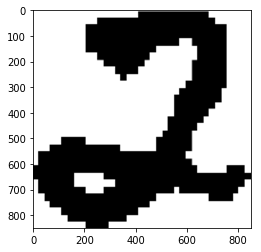

In [39]:
import requests
from PIL import Image
 
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

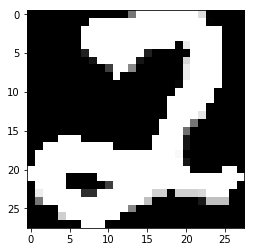

In [40]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1, 784)

In [41]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [5]
